In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [0]:
iris = load_iris()

In [74]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [0]:
test_idx = [0, 50, 100]

In [0]:
#training data 
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

In [0]:
#testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

In [78]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
print(test_target)
print(test_data)

[0 1 2]
[[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]]


In [80]:
print(clf.predict(test_data))

[0 1 2]


In [81]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

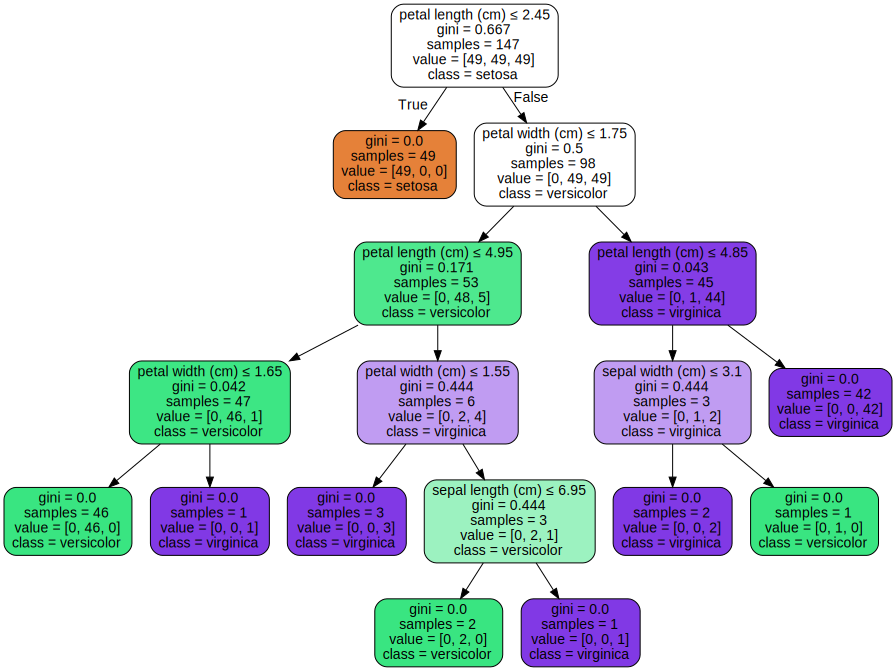

In [82]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [0]:
X = iris.data
y = iris.target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

In [0]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(X_train, y_train)
predictions  = my_classifier.predict(X_test)

In [86]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.96


In [0]:
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()
my_classifier.fit(X_train, y_train)
predictions  = my_classifier.predict(X_test)

In [88]:
print(accuracy_score(y_test, predictions))

0.96


In [0]:
from scipy.spatial import distance
def euc(a, b):
  return distance.euclidean(a, b)

In [0]:
class ScrappyKNN():
  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    predictions = []
    for row in X_test:
      label = self.closest(row)
      predictions.append(label)
    return predictions
  
  def closest(self, row):
    best_dist = euc(row, self.X_train[0])
    best_index = 0
    for i in range(1, len(self.X_train)):
      dist = euc(row, self.X_train[i])
      if dist < best_dist:
        best_dist = dist
        best_index = i
    return self.y_train[best_index]

In [93]:
my_classifier = ScrappyKNN()
my_classifier.fit(X_train, y_train)
predictions  = my_classifier.predict(X_test)
print(accuracy_score(y_test, predictions))

0.96
